# Estimation of a Categorical distribution

## Maximum Likelihood Estimation

We observe a dataset $\{x^{(n)}\}_{n=1\dots N}$. The model for a single observation is a categorical distribution with parameter $\pi = (\pi_1, \dots, \pi_I)$ where 

\begin{eqnarray}
x^{(n)} & \sim & p(x|\pi) = \prod_{i=1}^{I} \pi_i^{\ind{i = x^{(n)}}}
\end{eqnarray}
where $\sum_i \pi_i  = 1$.

The loglikelihood of the entire dataset is

\begin{eqnarray}
{\cal L}(\pi_1,\dots,\pi_I) & = & \sum_{n=1}^N\sum_{i=1}^I \ind{i = x^{(n)}} \log \pi_i
\end{eqnarray}
This is a constrained optimisation problem.
Form the Lagrangian
\begin{eqnarray}
\Lambda(\pi, \lambda) & = & \sum_{n=1}^N\sum_{i'=1}^I \ind{i' = x^{(n)}} \log \pi_{i'}  + \lambda \left( 1 - \sum_{i'} \pi_{i'} \right ) \\
\frac{\partial \Lambda(\pi, \lambda)}{\partial \pi_i} & = & \sum_{n=1}^N \ind{i = x^{(n)}} \frac{1}{\pi_i} - \lambda = 0 \\
\pi_i & = & \frac{\sum_{n=1}^N \ind{i = x^{(n)}}}{\lambda}
\end{eqnarray}

We solve for $\lambda$
\begin{eqnarray}
1 & = & \sum_i \pi_i = \frac{\sum_{i=1}^I \sum_{n=1}^N \ind{i = x^{(n)}}}{\lambda} \\
\lambda & = & \sum_{i=1}^I \sum_{n=1}^N \ind{i = x^{(n)}} =  \sum_{n=1}^N 1 = N
\end{eqnarray}

Hence
\begin{eqnarray}
\pi_i & = & \frac{\sum_{n=1}^N \ind{i = x^{(n)}}}{N}
\end{eqnarray}

In [17]:
# %load template_equations.py
from IPython.display import display, Math, Latex, HTML
import notes_utilities as nut
from importlib import reload
reload(nut)
Latex('$\DeclareMathOperator{\trace}{Tr}$')

L = nut.pdf2latex_dirichlet(x=r'\pi', a=r'a',N=r'I', i='i')

display(HTML(nut.eqs2html_table(L)))

\begin{eqnarray}\mathcal{D}(\pi_{1:I}; a_{1:I} )\end{eqnarray},\mathcal{D}(\pi_{1:I}; a_{1:I} )
\begin{eqnarray}\frac{\Gamma(\sum_{i} a_{i})}{\prod_{i} \Gamma(a_{i})} \prod_{{i}=1}^{I} {\pi}_{i}^{a_{i} - 1} \end{eqnarray},\frac{\Gamma(\sum_{i} a_{i})}{\prod_{i} \Gamma(a_{i})} \prod_{{i}=1}^{I} {\pi}_{i}^{a_{i} - 1}
\begin{eqnarray}\exp\left(\log{\Gamma(\sum_{i} a_{i})} - {\sum_{i} \log \Gamma(a_{i})} + \sum_{{i}=1}^{I} (a_{i} - 1) \log{\pi}_{i} \right)\end{eqnarray},\exp\left(\log{\Gamma(\sum_{i} a_{i})} - {\sum_{i} \log \Gamma(a_{i})} + \sum_{{i}=1}^{I} (a_{i} - 1) \log{\pi}_{i} \right)
\begin{eqnarray}\log{\Gamma(\sum_{i} a_{i})} - {\sum_{i} \log \Gamma(a_{i})} + \sum_{{i}=1}^{I} (a_{i} - 1) \log{\pi}_{i} \end{eqnarray},\log{\Gamma(\sum_{i} a_{i})} - {\sum_{i} \log \Gamma(a_{i})} + \sum_{{i}=1}^{I} (a_{i} - 1) \log{\pi}_{i}


#### Maximum A-Posteriori Estimation

$$
\pi \sim \mathcal{D}(\pi_{1:I}; a_{1:I} )
$$
where $\sum_i \pi_i  = 1$. For $n = 1\dots N$
\begin{eqnarray}
x^{(n)} & \sim & p(x|\pi) = \prod_{i=1}^{I} \pi_i^{\ind{i = x^{(n)}}}
\end{eqnarray}
$X = \{x^{(1)},\dots,x^{(N)} \}$

The posterior is 
\begin{align}
\log p(\pi_{1:I}| X) & =^+  \log p(\pi_{1:I}, X) \\
& = \log{\Gamma(\sum_{i} a_{i})} - {\sum_{i} \log \Gamma(a_{i})} 
+ \sum_{{i}=1}^{I} (a_{i} - 1) \log{\pi}_{i}  
+ \sum_{i=1}^I\sum_{n=1}^N \ind{i = x^{(n)}} \log \pi_i \\
 & =^+    \sum_{i=1}^I \left(a_i - 1 +  \sum_{n=1}^N \ind{i = x^{(n)}}\right) \log \pi_i 
\end{align}

Finding the parameter vector $\pi_{1:I}$ that maximizes the posterior density is a constrained optimisation problem. After omitting constant terms that do not depend on $\pi$, we form the Lagrangian
\begin{eqnarray}
\Lambda(\pi, \lambda) & = & \sum_{i=1}^I \left(a_i - 1 +  \sum_{n=1}^N \ind{i = x^{(n)}}\right) \log \pi_i   + \lambda \left( 1 - \sum_{i'} \pi_{i'} \right ) \\
\frac{\partial \Lambda(\pi, \lambda)}{\partial \pi_i} & = & \left(a_i - 1 + \sum_{n=1}^N \ind{i = x^{(n)}}\right) \frac{1}{\pi_i} - \lambda = 0 \\
\pi_i & = & \frac{a_i - 1 + \sum_{n=1}^N \ind{i = x^{(n)}}}{\lambda}
\end{eqnarray}


We solve for $\lambda$
\begin{eqnarray}
1 & = & \sum_i \pi_i = \frac{- I + \sum_{i=1}^I \left( a_i + \sum_{n=1}^N \ind{i = x^{(n)}  \right) }}{\lambda} \\
\lambda & = &  N - I + \sum_{i=1}^I a_i
\end{eqnarray}

Setting the count of observations equal to $i$ as $C_i \equiv \sum_{n=1}^N \ind{i = x^{(n)}}$, we obtain 

Hence
\begin{eqnarray}
\pi_i & = & \frac{C_i + a_i - 1}{N + \sum_{i=1}^I a_i - I}
\end{eqnarray}

## Full Bayesian Inference

Setting the count of observations equal to $i$ as $C_i \equiv \sum_{n=1}^N \ind{i = x^{(n)}}$, we obtain 


The posterior is 
\begin{eqnarray}
\log p(\pi_{1:I}, X) & = & \log{\Gamma(\sum_{i} a_{i})} - {\sum_{i} \log \Gamma(a_{i})} +  \sum_{i=1}^I \left(\left(a_i + \sum_{n=1}^N \ind{i = x^{(n)}}\right) - 1  \right) \log \pi_i \\
& =  & \log{\Gamma(\sum_{i} a_{i})} - {\sum_{i} \log \Gamma(a_{i})}\\
& &  + \sum_{i=1}^I (a_i + C_i - 1) \log \pi_i \\
 & & + \log{\Gamma(\sum_{i} (a_{i} + C_i) )} - {\sum_{i} \log \Gamma(a_{i} + C_i)} \\
 & & - \log{\Gamma(\sum_{i} (a_{i} + C_i) )} + {\sum_{i} \log \Gamma(a_{i} + C_i)} \\
 & = & \log \mathcal{D}(\pi_{1:I}, a_{1:I} ) + \log p(X) 
\end{eqnarray}

\begin{eqnarray}
\log p(X) & = & \log{\Gamma(\sum_{i} a_{i})} - {\sum_{i} \log \Gamma(a_{i})} - \log{\Gamma(\sum_{i} (a_{i} + C_i) )} + {\sum_{i} \log \Gamma(a_{i} + C_i)}
\end{eqnarray}

$a_+ = \sum_{i} a_{i}$ and $C_+ = \sum_{i}  C_i$
\begin{eqnarray}
p(X) & = & \frac{\Gamma(a_+) \prod_{i} \Gamma(a_{i} + C_i)}{\Gamma(a_+ + C_+ ) \prod_{i} \Gamma(a_{i})} = \frac{ \left(\prod_{i} \Gamma(a_{i} + C_i)\right)/ \Gamma(a_+ + C_+ )}{ \left(\prod_{i} \Gamma(a_{i}) \right)/ \Gamma(a_+)} = \frac{B(a + C)}{B(a)}
\end{eqnarray}


# Are $x$ and $y$ independent?
Suppose we observe a dataset of $(x, y)$ pairs where
$x \in \{1,\dots,I_1\}$ and
$y \in \{1,\dots,I_2\}$.

|  |  |
| --- | --- |
| $x^{(1)}$ | $y^{(1)}$ | 
| $\vdots$ | $\vdots$ | 
| $x^{(n)}$ | $y^{(n)}$ | 
| $\vdots$ | $\vdots$ | 
| $x^{(N)}$ | $y^{(N)}$ | 

$\newcommand{\ind}[1]{\left[#1\right]}$
We are given the counts of observations where $x = i$ while $y = j$. These counts can be stored as an array, that is known as a contingency table
$
S_{i,j} = \sum_{n=1}^N \ind{x^{(n)} = i}\ind{y^{(n)} = j}
$

In [15]:
from IPython.display import display, Math, Latex, HTML
import html_utils as htm
wd = '65px'
L = [[htm.TableCell('', width=wd), htm.TableCell('$y=1$', width=wd), htm.TableCell('$y=j$', width=wd), htm.TableCell('$y=I_2$', width='80px')],
     [r'$x=1$',r'$S_{1,1}$',r'',r'$S_{1,I_2}$'],
     [r'$x=i$',r'',r'$S_{i,j}$',r''],
     [r'$x=I_1$',r'$S_{I_1,1}$',r'',r'$S_{I_1,I_2}$']]

t = htm.make_htmlTable(L)
display(HTML(str(t)))
#print(str(t))

Our goal is deciding if the random variables $x$ and $y$ are independent or dependent, given some observations.

| |  || |
|-|-    |-|-|
| |$y$|| |
|$x$ |$3$|$5$|$9$|
| |$7$|$9$|$17$|

## Independent model $M_1$

\begin{equation}
p(x, y) = p(x) p(y) 
\end{equation}

\begin{align}
\pi_1 & \sim  \mathcal{D}(\pi_1; a_1) &
\pi_2 & \sim  \mathcal{D}(\pi_2; a_2) \\
x^{(n)} & \sim  \mathcal{C}(x; \pi_1) &
y^{(n)} & \sim  \mathcal{C}(y; \pi_2) 
\end{align}

We let 

* $X_{i+} = \sum_j X_{i,j}$ 
* $X_{+j} = \sum_i X_{i,j}$

The marginal likelihood can be found as 
\begin{eqnarray}
\log p(X|M_1) & = & \log{\Gamma(\sum_{i} a_{1}(i))} - {\sum_{i} \log \Gamma(a_{1}(i)} - \log{\Gamma(\sum_{i} (a_{1}(i) + \sum_{j} C(i,j)) )} + {\sum_{i} \log \Gamma(a_{1}(i) + \sum_{j} C(i,j))} \\
& & +\log{\Gamma(\sum_{j} a_{2}(j)} - {\sum_{j} \log \Gamma(a_{2}(j))} - \log{\Gamma(\sum_{j} (a_{2}(j) + \sum_{i} C(i,j)) )} + {\sum_{j} \log \Gamma(a_{2}(j) + \sum_{i} C(i,j))} \\
& = & \log{\Gamma(A_1)} - \sum_{i} \log \Gamma(a_{1}(i)) - \log{\Gamma(A_1+ N)} + {\sum_{i} \log \Gamma(a_{1}(i) + C_1(i))} \\
& & + \log{\Gamma(A_2)} - {\sum_{j} \log \Gamma(a_{2}(j))} - \log{\Gamma(A_2 + N )} + {\sum_{j} \log \Gamma(a_{2}(j) +  C_2(j))} \\
\end{eqnarray}

### Dependent model $M_2$
\begin{equation}
p(x_1, x_2)
\end{equation}

$\pi_{1,2}$ is a $S_1 \times S_2$ matrix where the joint distribution of entries is Dirichlet $\mathcal{D}(\pi_{1,2}; a_{1,2})$ with $S_1 \times S_2$ parameter matrix $a_{1,2}$. Then, the probability that $p(x_1 = i, x_2 = j|\pi_{1,2}) = \pi_{1,2}(i,j)$.

\begin{eqnarray}
\pi_{1,2} & \sim & \mathcal{D}(\pi_{1,2}; a_{1,2}) \\
(x_1, x_2)^{(n)} & \sim & \mathcal{C}((x_1,x_2); \pi_{1,2}) \\
\end{eqnarray}

\begin{eqnarray}
\log p(X|M_2) & = & \log{\Gamma(A_{1,2})} - {\sum_{i,j} \log \Gamma(a_{1,2}(i,j))} - \log{\Gamma(A_{1,2}+ N)} + {\sum_{i,j} \log \Gamma(a_{1,2}(i,j) + C(i,j))} 
\end{eqnarray}



### Dependent model $M_3$
\begin{equation}
p(x_1, x_2) = p(x_1) p(x_2|x_1) 
\end{equation}

\begin{eqnarray}
\pi_1 & \sim & \mathcal{D}(\pi_1; a_1) \\
\pi_{2,1} & \sim & \mathcal{D}(\pi_2; a_2) \\
\vdots \\
\pi_{2,S_1} & \sim & \mathcal{D}(\pi_2; a_2) \\
x_1^{(n)} & \sim & \mathcal{C}(x_1; \pi_1) \\
x_2^{(n)} & \sim & \mathcal{C}(x_2; \pi_{2}(x_1^{(n)},:)) 
\end{eqnarray}

\begin{eqnarray}
\log p(x_1^{(1:N)}|\pi_1) & = & \sum_n \sum_i \sum_j \ind{x_1^{(n)} = i} \ind{x_2^{(n)} = j} \log \pi_{1}(i)  =  \sum_i \sum_j C(i,j) \log \pi_{1}(i)
\end{eqnarray}
\begin{eqnarray}
\log p(x_2^{(1:N)}|\pi_2, x_1^{(1:N)} ) & = & \sum_n \sum_i \sum_j \ind{x_1^{(n)} = i} \ind{x_2^{(n)} = j} \log \pi_{2}(i,j) =  \sum_i \sum_j C(i,j) \log \pi_{2}(i,j)
\end{eqnarray}

\begin{eqnarray}
\log p(\pi_1) & = & \log{\Gamma(\sum_{i} a_{1}(i))} - {\sum_{i} \log \Gamma(a_{1}(i))} + \sum_{{i}=1}^{S_1} (a_{1}(i) - 1) \log{\pi_1}(i) 
\end{eqnarray}
\begin{eqnarray}
\log p(\pi_2) & = & \sum_i \left(\log{\Gamma(\sum_{j} a_{2}(i,j))} - {\sum_{j} \log \Gamma(a_{2}(i,j))} + \sum_{{j}=1}^{S_2} (a_{2}(i,j) - 1) \log{\pi_2}(i,j) \right)
\end{eqnarray}

The joint distribution is
\begin{eqnarray}
\log p(X, \pi| M_2)&= & \log{\Gamma(\sum_{i} a_{1}(i))} - {\sum_{i} \log \Gamma(a_{1}(i))} + \sum_{{i}=1}^{S_1} (a_{1}(i) + C_1(i) - 1) \log{\pi_1}(i)  \\
& & + \sum_i \left(\log{\Gamma(\sum_{j} a_{2}(i,j))} - {\sum_{j} \log \Gamma(a_{2}(i,j))} + \sum_{{j}=1}^{S_2} (a_{2}(i,j) + C(i,j) - 1) \log{\pi_2}(i,j) \right) 
\end{eqnarray}

We will assume $a_2(i,j) = a_2(i',j)$ for all $i$ and $i'$.

\begin{eqnarray}
\log p(X| M_2) & = & \log{\Gamma(\sum_{i} a_{1}(i))} 
- {\sum_{i} \log \Gamma(a_{1}(i))}
- \log{\Gamma(\sum_{i} a_{1}(i) + C_1(i))} 
+ \sum_{i} \log \Gamma(a_{1}(i) + C_1(i)) \\ 
& & + \sum_i \left( \log\Gamma(\sum_{j} a_{2}(i,j)) - \sum_{j} \log \Gamma(a_{2}(i,j)) - \log\Gamma( \sum_{j} a_{2}(i,j) + C(i,j)) + \sum_j \log\Gamma( a_{2}(i,j) + C(i,j) ) \right) \\
& = & \log{\Gamma(A_1)} - {\sum_{i} \log \Gamma(a_{1}(i))} - \log{\Gamma(A_1+ N)} + {\sum_{i} \log \Gamma(a_{1}(i) + C_1(i))} \\
& & + \sum_i \left( \log{\Gamma(A_2)} - {\sum_{j} \log \Gamma(a_{2}(j))} - \log{\Gamma(A_2 + C_1(i) )} + {\sum_{j} \log \Gamma(a_{2}(j) + C(i,j))} \right) 
\end{eqnarray}


### Dependent model $M_3b$
The derivation is similar and corresponds to the factorization:

\begin{equation}
p(x_1, x_2) = p(x_2) p(x_1|x_2) 
\end{equation}

In [8]:
import numpy as np
from notes_utilities import randgen, log_sum_exp, normalize_exp, normalize

import scipy as sc
from scipy.special import gammaln

C = np.array([[3,1,9],[7,9,17]])
#C = 1*np.array([[1,1,3],[1,1,7]])

#C = np.array([[0,1,1],[1,0,2]])

C_i = np.sum(C, axis=1)
C_j = np.sum(C, axis=0)

N = np.sum(C)
S_1 = C.shape[0]
S_2 = C.shape[1]

#M1 Parameter
M1 = {'a_1': S_2*np.ones(S_1), 'a_2': S_1*np.ones(S_2), 'A_1': None, 'A_2': None}
M1['A_1'] = np.sum(M1['a_1'])
M1['A_2'] = np.sum(M1['a_2'])
#p(x_1) p(x_2)
log_marglik_M1 = gammaln(M1['A_1']) - np.sum(gammaln(M1['a_1'])) - gammaln(M1['A_1'] + N) + np.sum(gammaln(M1['a_1'] + C_i)) \
            + gammaln(M1['A_2']) - np.sum(gammaln(M1['a_2'])) - gammaln(M1['A_2'] + N) + np.sum(gammaln(M1['a_2'] + C_j))

# p(x_1, x_2)
M2 = {'a_12': np.ones((S_1,S_2)), 'A_12':None}
M2['A_12'] = np.sum(M2['a_12'])
log_marglik_M2 = gammaln(M2['A_12']) - np.sum(gammaln(M2['a_12'])) - gammaln(M2['A_12'] + N) + np.sum(gammaln(M2['a_12'] + C)) 

    
    
M3 = {'a_1': S_2*np.ones(S_1), 'a_2': np.ones(S_2), 'A_1': None, 'A_2': None}
M3['A_1'] = np.sum(M3['a_1'])
M3['A_2'] = np.sum(M3['a_2'])

#p(x_1) p(x_2|x_1)
log_marglik_M3 = gammaln(M3['A_1']) - np.sum(gammaln(M3['a_1'])) - gammaln(M3['A_1'] + N) + np.sum(gammaln(M3['a_1'] + C_i)) 
for i in range(S_1):
    log_marglik_M3 +=  gammaln(M3['A_2']) - np.sum(gammaln(M3['a_2'])) - gammaln(M3['A_2'] + C_i[i]) + np.sum(gammaln(M3['a_2'] + C[i,:]))

# Beware the prior parameters
M3b = {'a_1': np.ones(S_1), 'a_2': S_1*np.ones(S_2), 'A_1': None, 'A_2': None}
M3b['A_1'] = np.sum(M3b['a_1'])
M3b['A_2'] = np.sum(M3b['a_2'])

#p(x_2) p(x_1|x_2)
log_marglik_M3b = gammaln(M3b['A_2']) - np.sum(gammaln(M3b['a_2'])) - gammaln(M3b['A_2'] + N) + np.sum(gammaln(M3b['a_2'] + C_j)) 
for j in range(S_2):
    log_marglik_M3b +=  gammaln(M3b['A_1']) - np.sum(gammaln(M3b['a_1'])) - gammaln(M3b['A_1'] + C_j[j]) + np.sum(gammaln(M3b['a_1'] + C[:,j]))


print('M1:', log_marglik_M1)
print('M2:', log_marglik_M2)
print('M3:', log_marglik_M3)
print('M3b:', log_marglik_M3b)

print('Log Odds, M1-M2')
print(log_marglik_M1 - log_marglik_M2)
print(normalize_exp([log_marglik_M1, log_marglik_M2]))

print('Log Odds, M1-M3')
print(log_marglik_M1 - log_marglik_M3)
print(normalize_exp([log_marglik_M1, log_marglik_M3]))

print('Log Odds, M1-M3b')
print(log_marglik_M1 - log_marglik_M3b)
print(normalize_exp([log_marglik_M1, log_marglik_M3b]))


M1: -193.727948747
M2: -170.948939201
M3: -170.948939201
M3b: -170.948939201
Log Odds, M1-M2
-22.7790095463
[  1.27997607e-10   1.00000000e+00]
Log Odds, M1-M3
-22.7790095463
[  1.27997607e-10   1.00000000e+00]
Log Odds, M1-M3b
-22.7790095463
[  1.27997607e-10   1.00000000e+00]


Conceptually $M_2$, $M_3$ and $M_3b$ should have the same marginal likelihood score, as the dependence should not depend on how we parametrize the conditional probability tables. However, this is dependent on the choice of the prior parameters. 

How should the prior parameters of $M_2$, $M_3$ and $M_3b$ be chosen such that we get the same evidence score?

The models 
$M_2$, $M_3$ and $M_3b$ are all equivlent, if the prior parameters are chosen appropriately. For $M_2$ and $M_3$, we need to take $a_1(i) = \sum_j a_{1,2}(i,j)$.

For example, if in $M_2$, the prior parameters $a_{1,2}$ are chosen as
\begin{eqnarray}
a_{1,2} & = & \left(\begin{array}{ccc} 1 & 1 & 1\\ 1 & 1 & 1 \end{array} \right)
\end{eqnarray}

we need to choose in model $M_3$
\begin{eqnarray}
a_{1} & = & \left(\begin{array}{c} 3 \\ 3  \end{array} \right)
\end{eqnarray}
\begin{eqnarray}
a_{2} & = & \left(\begin{array}{ccc} 1 & 1 & 1\\ 1 & 1 & 1 \end{array} \right)
\end{eqnarray}

and in model $M_3b$
\begin{eqnarray}
a_{2} & = & \left(\begin{array}{ccc} 2 & 2 & 2  \end{array} \right)
\end{eqnarray}
\begin{eqnarray}
a_{1} & = & \left(\begin{array}{ccc} 1 & 1 & 1\\ 1 & 1 & 1 \end{array} \right)
\end{eqnarray}

This is due to fact that the marginals of a Dirichlet distribution are also Dirichlet. In particular,
if a probability vector $x$ and corresponding parameter vector $a$ are partitioned as $x = (x_\iota, x_{-\iota})$ 
and $a = (a_\iota, a_{-\iota})$, the Dirichlet distribution
$$
\mathcal{D}(x_\iota, x_{-\iota}; a_\iota, a_{-\iota})
$$
has marginals 
$$
\mathcal{D}(X_{\iota}, X_{-\iota}; A_{\iota}, A_{-\iota})
$$
where $X_\iota = \sum_{i \in \iota}  x_i$ and $X_{-\iota} = \sum_{i \in -\iota}  x_i$, where $A_\iota = \sum_{i \in \iota}  a_i$ and $A_{-\iota} = \sum_{i \in -\iota}  a_i$. The script below verifies that the marginals are indeed distributed according to this formula.


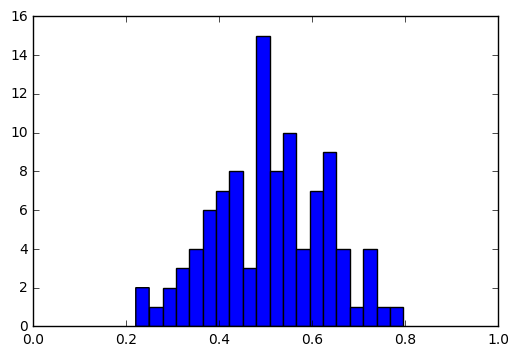

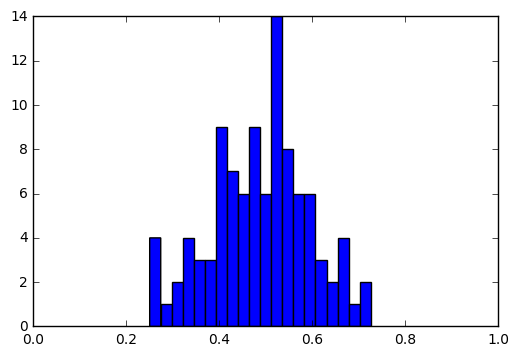

In [40]:
S_1 = 2
S_2 = 10
M = S_1*S_2

a = np.ones(M)

N = 100
P = np.random.dirichlet(a, size=N)
A = np.zeros((N,S_1))
B = np.zeros((N*S_1,S_2))

for n in range(N):
    temp = P[n,:].reshape((S_1,S_2))
    A[n,:] = np.sum(temp, axis=1)
    for i in range(S_1):
        B[(n*S_1+i),:] = temp[i,:]/A[n,i]

import pylab as plt

plt.hist(A[:,0],bins=20)
plt.gca().set_xlim([0,1])
#plt.plot(B[:,0],B[:,1],'.')
plt.show()

P2 = np.random.dirichlet(S_2*np.ones(S_1), size=N)
plt.hist(P2[:,0],bins=20)
plt.gca().set_xlim([0,1])
plt.show()

In [83]:
import numpy as np
from notes_utilities import randgen, log_sum_exp, normalize_exp, normalize

import scipy as sc
from scipy.special import gammaln

# Log of multivariate Beta function
def log_mbeta(a):
    return sum(gammaln(a.flatten())) - gammaln(sum(a.flatten()))

a = 1
b = 1


S = np.array([[2,1],[0,1]])
#S = np.array([[2,1,0],[1,0,1]])

S_ip = np.sum(S, axis=1)
S_pj = np.sum(S, axis=0)
S_pp = np.sum(S)

gamma = 1
alpha = gamma*np.ones_like(S)

alpha_ip = np.sum(alpha, axis=1)
alpha_pj = np.sum(alpha, axis=0)
alpha_pp = np.sum(alpha)

#
log_const = a*np.log(b) -  (a+S_pp)*np.log(b+1) + gammaln(a + S_pp) - gammaln(a) - np.sum(gammaln(S+1))
print(log_const)

# inconsistent independent 
alpha_wrong_ip = gamma*np.ones_like(alpha_ip)
alpha_wrong_pj = gamma*np.ones_like(alpha_pj)

# i    j
marglik_1_wrong =  log_mbeta(S_ip+alpha_wrong_ip) - log_mbeta(alpha_wrong_ip) 
marglik_1_wrong += log_mbeta(S_pj+alpha_wrong_pj) - log_mbeta(alpha_wrong_pj)
# i -> j
marglik_2_wrong  =  log_mbeta(S_ip+alpha_wrong_ip) - log_mbeta(alpha_wrong_ip) 
for i in range(S.shape[0]):
    marglik_2_wrong +=  log_mbeta(S[i,:]+alpha[i,:]) - log_mbeta(alpha[i,:])
# i <- j
marglik_3_wrong  =  log_mbeta(S_pj+alpha_wrong_pj) - log_mbeta(alpha_wrong_pj) 
for j in range(S.shape[1]):
    marglik_3_wrong +=  log_mbeta(S[:,j]+alpha[:,j]) - log_mbeta(alpha[:,j])

# independent
marglik_1  = log_mbeta(S_ip+alpha_ip) - log_mbeta(alpha_ip) 
marglik_1 += log_mbeta(S_pj+alpha_pj) - log_mbeta(alpha_pj)

# i -> j
marglik_2  =  log_mbeta(S_ip+alpha_ip) - log_mbeta(alpha_ip) 
for i in range(S.shape[0]):
    marglik_2 +=  log_mbeta(S[i,:]+alpha[i,:]) - log_mbeta(alpha[i,:])
# i <- j
marglik_3  =  log_mbeta(S_pj+alpha_pj) - log_mbeta(alpha_pj) 
for j in range(S.shape[1]):
    marglik_3 +=  log_mbeta(S[:,j]+alpha[:,j]) - log_mbeta(alpha[:,j])

# dependent
marglik_4 =  log_mbeta(S+alpha) - log_mbeta(alpha)

# 
print('model, consistent, inconsistent')
print('i  j', marglik_1+log_const, marglik_1_wrong+log_const)
print('i->j', marglik_2+log_const, marglik_2_wrong+log_const)
print('i<-j', marglik_3+log_const, marglik_3_wrong+log_const)
print('i--j', marglik_4+log_const)

print(S)

-0.980829253012
model, consistent, inconsistent
i  j -6.99291308732 -7.37775890823
i->j -7.02108396429 -7.15461535691
i<-j -7.02108396429 -7.27239839257
i--j -7.02108396429
[[2 1]
 [0 1]]


### Question

Are two given histograms drawn from the same distribution?

$[3,5,12,4]$

$[8, 14, 31, 14]$

## Visualizing the Dirichlet Distribution

[http://blog.bogatron.net/blog/2014/02/02/visualizing-dirichlet-distributions/]

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri
from functools import reduce
from scipy.special import gammaln

corners = np.array([[0, 0], [1, 0], [0.5, 0.75**0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)


# Mid-points of triangle sides opposite of each corner
midpoints = [(corners[(i + 1) % 3] + corners[(i + 2) % 3]) / 2.0 \
             for i in range(3)]

def xy2bc(xy, tol=1.e-3):
    '''Converts 2D Cartesian coordinates to barycentric.'''
    s = [(corners[i] - midpoints[i]).dot(xy - midpoints[i]) / 0.75 \
         for i in range(3)]
    return np.clip(s, tol, 1.0 - tol)

class Dirichlet(object):
    def __init__(self, alpha):
        self._alpha = np.array(alpha)
        self._coef = gammaln(np.sum(self._alpha)) - np.sum(gammaln(self._alpha))
    def log_pdf(self, x):
        return self._coef + np.sum(np.log(x)*(self._alpha - 1)) 
    def pdf(self, x):
        '''Returns pdf value for `x`.'''
        return np.exp(self.log_pdf(x))
        
def draw_pdf_contours(dist, nlevels=200, subdiv=8, **kwargs):

    refiner = tri.UniformTriRefiner(triangle)
    trimesh = refiner.refine_triangulation(subdiv=subdiv)
    pvals = [dist.pdf(xy2bc(xy)) for xy in zip(trimesh.x, trimesh.y)]

    plt.tricontourf(trimesh, pvals, nlevels, **kwargs)
    plt.axis('equal')
    plt.xlim(0, 1)
    plt.ylim(0, 0.75**0.5)
    plt.axis('off')

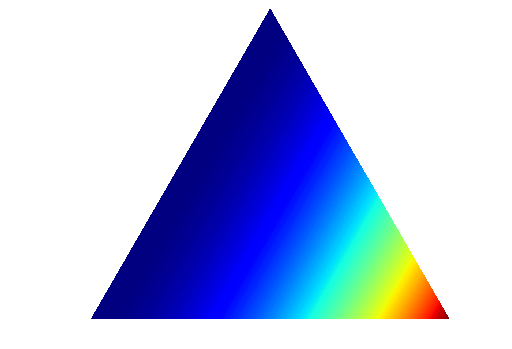

In [6]:
draw_pdf_contours(Dirichlet([1, 3, 1]))

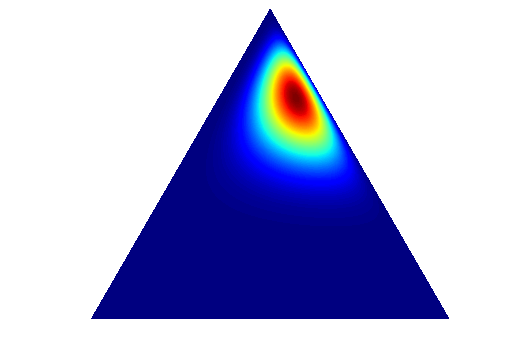

In [7]:
draw_pdf_contours(Dirichlet([1.99, 3.99, 10.99]))

# 6-faced die with repeated labels

Consider a die where the numbers on each face are labeled, possibly with repetitions, from the set $1\dots 6$. 
A 'normal' die has labels $1,2,3,4,5,6$ but we allow other labelings, for example as $1,1,3,5,5,5$ or $1,1,1,1,1,6$.

Can we construct a method to find how the die has been labeled from a sequence of outcomes?  



# Does my data have a single cluster or are there two clusters?

We observe a dataset of $N$ points and want to decide if there are one or two clusters. For example, the below dataset, when visualized seems to suggest two clusters; however the separation is not very clear; perhaps a single component might have been also sufficient. How can we derive a procedure that leads to a resonable answer in this ambigious situation?

<img src="clusters.png" width='180' align='center'>

One principled approach is based on Bayesian model selection. Our approach will be describing two alternative generative models for data. Each generative model will reflect our assumption what it means to have clusters. In other words, we should describe two different procedures: how to generate a dataset with a single cluster, or a datset that has two clusters. Once we have a description of each generative procedure, we may hope to convert our qualitative question (how many clusters?) into a well defined computational procedure. 

Each generative procedure will be a different probability model and we will compute the marginal posterior distribution conditioned on an observed dataset.

The single cluster model will have a single cluster center, denoed as $\mu$. Once $\mu$ is generated, each observation is generated by a Gaussian distribution with variance $R$, centered around $\mu$.

Model $M =1$: Single Cluster
\begin{eqnarray}
\mu & \sim & {\mathcal N}(\mu; 0, P) \\
x_i | \mu & \sim & {\mathcal N}(x; \mu, R)
\end{eqnarray}

The parameter $P$ denotes a natural range for the mean, $R$ denotes the variance of data, the amount of spread around the mean. To start simple, we will assume that these parameters are known; we will able to relax this assumption later easily.

Below, we show an example where each data point is a scalar.

In [1]:
# Parameters
P = 100
R = 10

# Number of datapoints
N = 5

mu = np.random.normal(0, np.sqrt(P))
x  = np.random.normal(mu, np.sqrt(R), size=(N))

plt.figure(figsize=(10,1))
plt.plot(mu, 0, 'r.')
plt.plot(x, np.zeros_like(x), 'x')
ax = plt.gca()
ax.set_xlim(3*np.sqrt(P)*np.array([-1,1]))
ax.set_ylim([-0.1,0.1])
ax.axis('off')
plt.show()

NameError: name 'np' is not defined

Model $M = 2$: Two Clusters
\begin{eqnarray}
\mu_0 & \sim & {\mathcal{N}}(\mu; 0, P) \\
\mu_1 & \sim & {\mathcal{N}}(\mu; 0, P) \\
c_i & \sim & {\mathcal{BE}}(r; 0.5) \\
x_i | \mu_0, \mu_1, c_i & \sim & {\mathcal N}(x; \mu_0, R)^{1-c_i} {\mathcal N}(x; \mu_1, R)^{c_i}
\end{eqnarray}

The parameter $P$ denotes a natural range for both means, $R$ denotes the variance of data in each cluster. The variables $r_i$ are the indicators that show the assignment of each datapoint to one of the clusters.

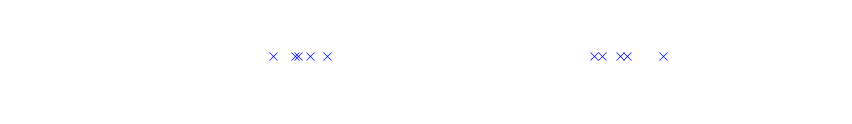

In [13]:
# Parameters
P = 100
R = 2

# Number of datapoints
N = 10

# Number of clusters
M = 2

mu = np.random.normal(0, np.sqrt(P), size=(M))
c = np.random.binomial(1, 0.5, size=N)
x = np.zeros(N)
for i in range(N):
    x[i]  = np.random.normal(mu[c[i]], np.sqrt(R))

plt.figure(figsize=(10,1))
#plt.plot(mu, np.zeros_like(mu), 'r.')
plt.plot(x, np.zeros_like(x), 'x')
ax = plt.gca()
ax.set_xlim(3*np.sqrt(P)*np.array([-1,1]))
ax.set_ylim([-0.1,0.1])
ax.axis('off')
plt.show()

#### Extension
We dont know the component variances


#### Combining into a single model

Capture

Recapture

### Change point
Coin switch

Coal Mining Data
 Single Change Point
 Multiple Change Point

# Bivariate Gaussian model selection


Suppose we are given a dataset $X = \{x_1, x_2, \dots, x_N \}$ where $x_n \in \mathbb{R}^K$ for $n=1 \dots N$ and consider two competing models:

- ### Model $m=1$:
$\newcommand{\diag}{\text{diag}}$

- Observation
\begin{eqnarray}
\text{for}\; n=1\dots N&& \\
x_n| s_{1:K} & \sim &  \mathcal{N}\left(x; 0, \diag\{s_1, \dots, s_K\}\right) = \mathcal{N}\left(x; 0, \left(\begin{array}{ccc} s_1 & 0 & 0\\0 & \ddots & 0 \\ 0 & \dots & s_K \end{array} \right) \right)
\end{eqnarray}

$$
p(x_n| s_{1:K})  = 
\prod_{k=1}^K \mathcal{N}(x_{k,n}; 0, s_k) 
$$

$$
p(X|s_{1:K} ) = \prod_{n=1}^N p(x_n| s_{1:K})  = 
\prod_{n=1}^N \prod_{k=1}^K \mathcal{N}(x_{k,n}; 0, s_k) 
$$


- Prior
\begin{eqnarray}
\text{for}\; k=1\dots K&& \\
s_k & \sim & \mathcal{IG}(s_k; \alpha, \beta) 
\end{eqnarray}



- ### Model $m=2$:

-- Observation

\begin{eqnarray}
x_n \sim \mathcal{N}(x_n; 0, \Sigma)=\left|{ 2\pi \Sigma } \right|^{-1/2} \exp\left(-\frac12 {x_n}^\top {\Sigma}^{-1} {x_n} \right)=\exp\left( -\frac{1}{2}\trace {\Sigma}^{-1} {x_n}{x_n}^\top -\frac{1}{2}\log \left|2{\pi}\Sigma\right|\right)
\end{eqnarray}

$$
{\cal IW}(\Sigma; 2a, 2B)  =  \exp( - (a + (k+1)/2) \log |\Sigma| - \trace B\Sigma^{-1}  - \log\Gamma_k(a) + a\log |B|) \\
$$

In [10]:
# %load template_equations.py
from IPython.display import display, Math, Latex, HTML
import notes_utilities as nut
from importlib import reload
reload(nut)
Latex('$\DeclareMathOperator{\trace}{Tr}$')

#L = nut.pdf2latex_gauss(x=r's', m=r'\mu',v=r'v')
#L = nut.pdf2latex_mvnormal(x=r's', m=r'\mu',v=r'\Sigma')
L = nut.pdf2latex_mvnormal(x=r'x_n', m=0,v=r'\Sigma')
#L = nut.pdf2latex_gamma(x=r'x', a=r'a',b=r'b')
#L = nut.pdf2latex_invgamma(x=r'x', a=r'a',b=r'b')
#L = nut.pdf2latex_beta(x=r'\pi', a=r'\alpha',b=r'\beta')

eq = L[0]+'='+L[1]+'='+L[2]
display(Math(eq))
display(Latex(eq))
display(HTML(nut.eqs2html_table(L)))

<IPython.core.display.Math object>

<IPython.core.display.Latex object>

"\begin{eqnarray}\mathcal{N}(x_n; 0, \Sigma)\end{eqnarray}","\mathcal{N}(x_n; 0, \Sigma)"
\begin{eqnarray}\left|{ 2\pi \Sigma } \right|^{-1/2} \exp\left(-\frac12 {x_n}^\top {\Sigma}^{-1} {x_n} \right)\end{eqnarray},\left|{ 2\pi \Sigma } \right|^{-1/2} \exp\left(-\frac12 {x_n}^\top {\Sigma}^{-1} {x_n} \right)
\begin{eqnarray}\exp\left( -\frac{1}{2}\trace {\Sigma}^{-1} {x_n}{x_n}^\top -\frac{1}{2}\log \left|2{\pi}\Sigma\right|\right)\end{eqnarray},\exp\left( -\frac{1}{2}\trace {\Sigma}^{-1} {x_n}{x_n}^\top -\frac{1}{2}\log \left|2{\pi}\Sigma\right|\right)
\begin{eqnarray} -\frac{1}{2}\trace {\Sigma}^{-1} {x_n}{x_n}^\top -\frac{1}{2}\log \left|2{\pi}\Sigma\right|\end{eqnarray},-\frac{1}{2}\trace {\Sigma}^{-1} {x_n}{x_n}^\top -\frac{1}{2}\log \left|2{\pi}\Sigma\right|


Computing the marginal likelihood

* #### Model 1

\begin{eqnarray}
p(X| m=1) & = & \int d{s_{1:K}} p(X|s_{1:K}) p(s_{1:K}) = 
\end{eqnarray}


In [8]:
# %load template_equations.py
from IPython.display import display, Math, Latex, HTML
import notes_utilities as nut
from importlib import reload
reload(nut)
Latex('$\DeclareMathOperator{\trace}{Tr}$')

#L = nut.pdf2latex_gauss(x=r's', m=r'\mu',v=r'v')
L = nut.pdf2latex_mvnormal(x=r'x_t', m=r'(Ax_{t-1})',v=r'Q')
#L = nut.pdf2latex_mvnormal(x=r's', m=0,v=r'I')
#L = nut.pdf2latex_gamma(x=r'x', a=r'a',b=r'b')
#L = nut.pdf2latex_invgamma(x=r'x', a=r'a',b=r'b')
#L = nut.pdf2latex_beta(x=r'\pi', a=r'\alpha',b=r'\beta')

eq = L[0]+'='+L[1]+'='+L[2]
display(Math(eq))

L = nut.pdf2latex_mvnormal(x=r'y_t', m=r'(Cx_{t})',v=r'R')
eq = L[0]+'='+L[1]+'='+L[2]
display(Math(eq))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [171]:
%connect_info

{
  "key": "5fe2a052-2599-465d-96fa-793a58b02ea2",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "shell_port": 65197,
  "stdin_port": 65199,
  "ip": "127.0.0.1",
  "hb_port": 65201,
  "control_port": 65200,
  "iopub_port": 65198
}

Paste the above JSON into a file, and connect with:
    $> ipython <app> --existing <file>
or, if you are local, you can connect with just:
    $> ipython <app> --existing kernel-457030b1-3d25-4222-9094-06fb4bbdbefe.json 
or even just:
    $> ipython <app> --existing 
if this is the most recent IPython session you have started.
